In [103]:
%automagic


Automagic is OFF, % prefix IS needed for line magics.


In [104]:
folder = '/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid/02_Desarrollo'
!ls -ltr {folder}

total 38292
-rw-rw-r-- 1 dsc dsc     1695 oct 19 16:58 00_work_line_notes.txt
-rw-rw-r-- 1 dsc dsc   309961 oct 20 11:55 01_ciclo_prueba_muestra.ipynb
-rw-rw-r-- 1 dsc dsc   337332 oct 23 16:39 02_ciclo_prueba_muestra_ordenado.ipynb
drwxrwxr-x 2 dsc dsc     4096 oct 23 16:56 csv_files
-rw-rw-r-- 1 dsc dsc    26352 oct 29 18:05 residuo.png
-rw-rw-r-- 1 dsc dsc    28090 oct 29 18:05 estacionalidad.png
-rw-rw-r-- 1 dsc dsc    16061 oct 29 18:05 tendencia.png
-rw-rw-r-- 1 dsc dsc    36481 oct 29 18:06 todo.png
-rw-rw-r-- 1 dsc dsc    28121 oct 29 18:37 residuo_nube.png
-rw-rw-r-- 1 dsc dsc    16512 oct 29 18:38 estacionalidad_nube.png
-rw-rw-r-- 1 dsc dsc    28910 oct 29 18:38 tendencia_nube.png
-rw-rw-r-- 1 dsc dsc    48129 oct 29 18:38 todo_nube.png
-rw-rw-r-- 1 dsc dsc  2403149 nov  3 18:08 04_ciclo_prueba_muestra_serie_temporal_lio.ipynb
-rw-rw-r-- 1 dsc dsc  1919420 nov  9 12:25 04_ciclo_prueba_muestra_serie_temporal.ipynb
-rw-rw-r-- 1 dsc dsc  1741628 nov 16 17:12 serie_completa.csv


In [105]:
import os
os.getcwd()

'/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid/02_Desarrollo'

In [106]:
os.chdir(folder)
os.getcwd()

'/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid/02_Desarrollo'

In [107]:
!ls -ltr datos_accs_madrid.csv

-rw-rw-r-- 1 dsc dsc 24017454 nov 16 18:37 datos_accs_madrid.csv


In [108]:
import pandas as pd
df_accs = pd.read_csv("datos_accs_madrid.csv", encoding='latin-1')

In [109]:
# Imports needed for the script
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [110]:
# Análisis Exploratorio Inicial
# Ahora veamos cuantas columnas y registros tenemos:
df_accs.shape

(252998, 11)

In [111]:
df_accs.head(3)

,FECHA,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,20
1,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,50
2,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,VIAJERO,MUJER,HERIDO_LEVE,40


In [112]:
# Comprobar valores nulos
df_accs.isnull().sum()

FECHA             0
HORA              0
DIA_SEMANA        0
DISTRITO          0
NUM_PERSONAS      0
TIPO_ACCIDENTE    0
TIPO_VEHICULO     0
TIPO_PERSONA      0
SEXO              0
LESIVIDAD         0
EDAD_APROX        0
dtype: int64

In [113]:
df_accs["NUM_PERSONAS"].unique()

array([ 1,  7,  2,  3,  4,  5,  9,  6,  8, 18, 13, 11, 22, 10, 14, 12, 16,
       19, 15])

In [114]:
df_accs["NUM_PERSONAS"].fillna('0', inplace=True) 

In [115]:
#df_accs["NUM_PERSONAS"]=df_accs['NUM_PERSONAS'].astype(np.int64)

In [116]:
df_accs["NUM_PERSONAS"].unique()

array([ 1,  7,  2,  3,  4,  5,  9,  6,  8, 18, 13, 11, 22, 10, 14, 12, 16,
       19, 15])

In [117]:
df_accs = df_accs.rename(columns = {'NUM_PERSONAS':'NUM_PERS_IMPLS'})
df_accs.head()

,FECHA,HORA,DIA_SEMANA,DISTRITO,NUM_PERS_IMPLS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,20
1,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,50
2,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,VIAJERO,MUJER,HERIDO_LEVE,40
3,01/01/2010,01:00,VIERNES,PUENTE DE VALLECAS,7,COLISION_MULTIPLE,NO_ASIGNADO,VIAJERO,MUJER,HERIDO_LEVE,25
4,01/01/2010,01:00,VIERNES,PUENTE DE VALLECAS,7,COLISION_MULTIPLE,NO_ASIGNADO,VIAJERO,MUJER,HERIDO_LEVE,30


In [118]:
df_accs.dtypes

FECHA             object
HORA              object
DIA_SEMANA        object
DISTRITO          object
NUM_PERS_IMPLS     int64
TIPO_ACCIDENTE    object
TIPO_VEHICULO     object
TIPO_PERSONA      object
SEXO              object
LESIVIDAD         object
EDAD_APROX        object
dtype: object

In [121]:
df_accs["NUM_PERS_IMPLS"] = df_accs["NUM_PERS_IMPLS"].replace({0:'NO_ASIGNADO'}, regex=True)

In [122]:
df_accs["NUM_PERS_IMPLS"].unique()

array([ 1,  7,  2,  3,  4,  5,  9,  6,  8, 18, 13, 11, 22, 10, 14, 12, 16,
       19, 15])

In [123]:
df_accs["DIA_SEMANA"].unique()

array(['VIERNES', 'SABADO', 'DOMINGO', 'LUNES', 'MARTES', 'MIERCOLES',
       'JUEVES'], dtype=object)

In [124]:
df_accs["DISTRITO"].unique()

array(['CHAMARTIN', 'PUENTE DE VALLECAS', 'CHAMBERI', 'RETIRO',
       'SALAMANCA', 'CARABANCHEL', 'CIUDAD LINEAL', 'MONCLOA-ARAVACA',
       'TETUAN', 'VILLA DE VALLECAS', 'MORATALAZ', 'ARGANZUELA',
       'SAN BLAS', 'VILLAVERDE', 'HORTALEZA', 'FUENCARRAL-EL PARDO',
       'VICALVARO', 'USERA', 'LATINA', 'BARAJAS', 'CENTRO'], dtype=object)

In [12]:
# algunas visualizaciones para comprender mejor nuestros datos.
# Mirar balanceo de etiquetas

In [125]:
df_accs.groupby('DIA_SEMANA').size()

DIA_SEMANA
DOMINGO      27249
JUEVES       38794
LUNES        36301
MARTES       37707
MIERCOLES    38697
SABADO       30798
VIERNES      43452
dtype: int64

In [127]:
df_accs.groupby('DISTRITO').size()

DISTRITO
ARGANZUELA             13050
BARAJAS                 3402
CARABANCHEL            15593
CENTRO                 17717
CHAMARTIN              18857
CHAMBERI               14466
CIUDAD LINEAL          16580
FUENCARRAL-EL PARDO    13750
HORTALEZA               8546
LATINA                 12218
MONCLOA-ARAVACA        13587
MORATALAZ               6246
PUENTE DE VALLECAS     16180
RETIRO                 13665
SALAMANCA              19269
SAN BLAS               11987
TETUAN                 13626
USERA                   8808
VICALVARO               3142
VILLA DE VALLECAS       5601
VILLAVERDE              6708
dtype: int64

In [128]:
df_accs.groupby('TIPO_ACCIDENTE').size()

TIPO_ACCIDENTE
ATROPELLO                     41398
CAIDA_BICICLETA                2616
CAIDA_CICLOMOTOR               2536
CAIDA_MOTOCICLETA             14155
CAIDA_VEHICULO_ 3_ RUEDAS        19
CAIDA_VIAJERO_ BUS             2794
CHOQUE_CON_OBJETO_FIJO        12595
COLISION_DOBLE               145544
COLISION_MULTIPLE             29195
OTRAS_CAUSAS                   1011
VUELCO                         1135
dtype: int64

In [129]:
df_accs.groupby('TIPO_VEHICULO').size()

TIPO_VEHICULO
AMBULANCIA            492
AUTOBUS_AUTOCAR      7017
AUTO_TAXI            8311
BICICLETA            5524
CAMION               2499
CICLOMOTOR           6045
FURGONETA            9873
MOTOCICLETA         32742
NO_ASIGNADO         46852
TURISMO            131483
VARIOS               2117
VEH.3 RUEDAS           43
dtype: int64

In [130]:
df_accs.groupby('TIPO_PERSONA').size()

TIPO_PERSONA
CONDUCTOR    158734
PEATON        15118
TESTIGO       31666
VIAJERO       47480
dtype: int64

In [131]:
df_accs.groupby('SEXO').size()

SEXO
HOMBRE         160165
MUJER           80717
NO_ASIGNADO     12116
dtype: int64

In [132]:
df_accs.groupby('LESIVIDAD').size()

LESIVIDAD
HERIDO_GRAVE      8850
HERIDO_LEVE     102716
INGRESO_LEVE    130053
MUERTO             275
NO_ASIGNADO      11104
dtype: int64

In [133]:
df_accs.groupby('EDAD_APROX').size()

EDAD_APROX
0               3128
10              5124
15              2593
20              9304
25             49329
30             31110
35             30169
40             26421
45             22167
50             17999
55             12454
65             13459
70              3656
75              6361
NO_ASIGNADO    19724
dtype: int64

In [136]:
df_accs.groupby('NUM_PERS_IMPLS').size()

NUM_PERS_IMPLS
1     183618
2      43631
3      14168
4       6165
5       2712
6       1116
7        755
8        270
9        139
10       120
11        56
12        28
13        46
14        33
15        17
16        19
18        41
19        42
22        22
dtype: int64

In [138]:
df_accs.columns

Index(['FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERS_IMPLS',
       'TIPO_ACCIDENTE', 'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD',
       'EDAD_APROX'],
      dtype='object')

In [139]:
# Comprobar valores nulos
df_accs.isnull().sum()

FECHA             0
HORA              0
DIA_SEMANA        0
DISTRITO          0
NUM_PERS_IMPLS    0
TIPO_ACCIDENTE    0
TIPO_VEHICULO     0
TIPO_PERSONA      0
SEXO              0
LESIVIDAD         0
EDAD_APROX        0
dtype: int64

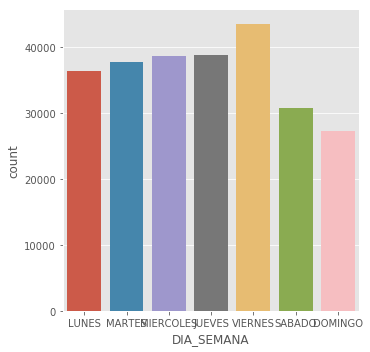

In [140]:
#figure(figsize=(5,5))
sb.catplot('DIA_SEMANA',data=df_accs,kind="count", \
           order=["LUNES", "MARTES", "MIERCOLES", "JUEVES", "VIERNES", "SABADO", "DOMINGO"])

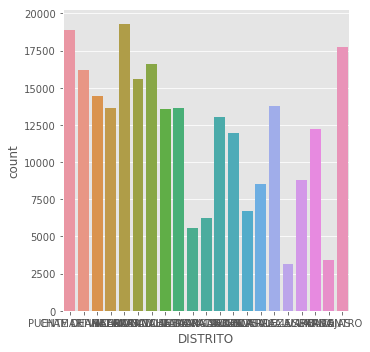

In [141]:
sb.catplot('DISTRITO',data=df_accs,kind="count")

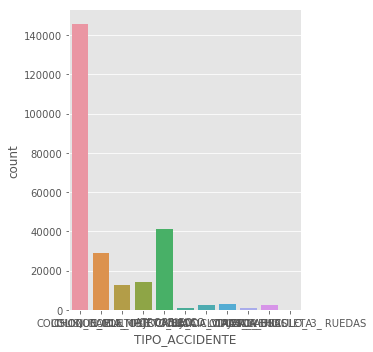

In [142]:
sb.catplot('TIPO_ACCIDENTE',data=df_accs,kind="count")

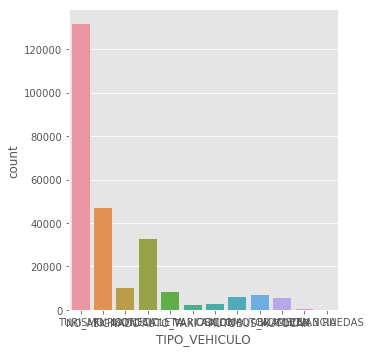

In [143]:
sb.catplot('TIPO_VEHICULO',data=df_accs,kind="count")

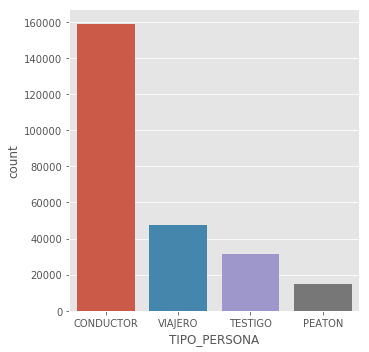

In [144]:
sb.catplot('TIPO_PERSONA',data=df_accs,kind="count")

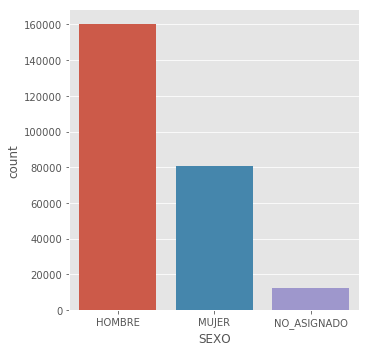

In [145]:
sb.catplot('SEXO',data=df_accs,kind="count")

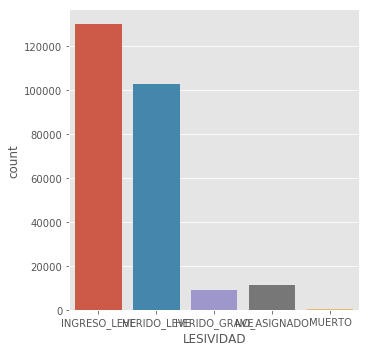

In [146]:
sb.catplot('LESIVIDAD',data=df_accs,kind="count")

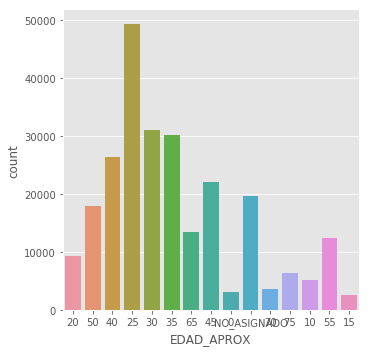

In [147]:
sb.catplot('EDAD_APROX',data=df_accs,kind="count")

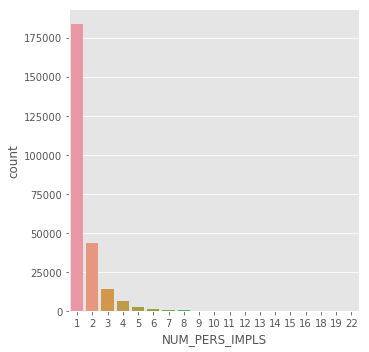

In [149]:
sb.catplot('NUM_PERS_IMPLS',data=df_accs,kind="count")

In [150]:
df_accs.columns

Index(['FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERS_IMPLS',
       'TIPO_ACCIDENTE', 'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD',
       'EDAD_APROX'],
      dtype='object')

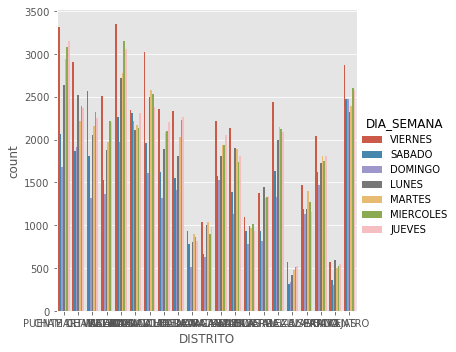

In [151]:
sb.catplot('DISTRITO',data=df_accs,hue='DIA_SEMANA',kind="count")

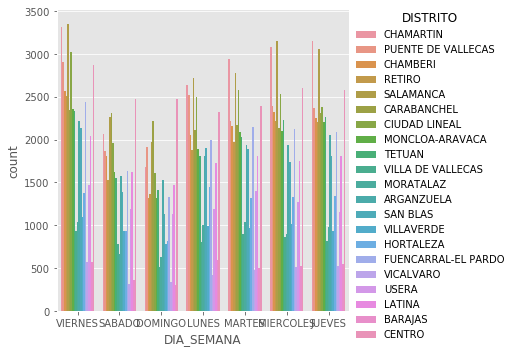

In [166]:
sb.catplot('DIA_SEMANA',data=df_accs,hue='DISTRITO',kind="count")

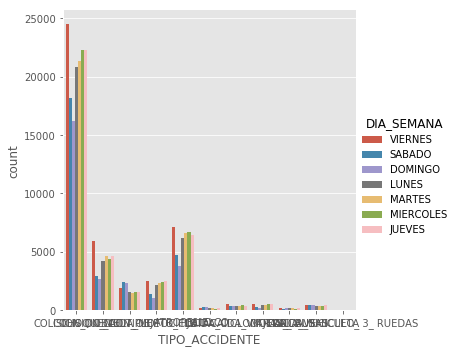

In [167]:
sb.catplot('TIPO_ACCIDENTE',data=df_accs,hue='DIA_SEMANA',kind="count")

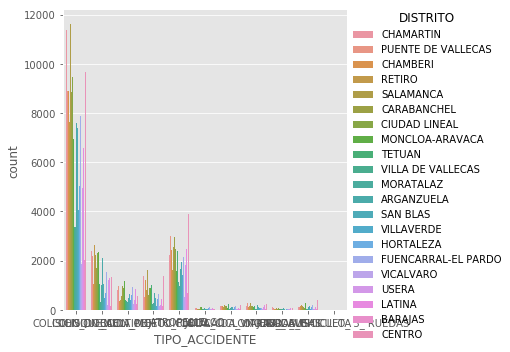

In [168]:
sb.catplot('TIPO_ACCIDENTE',data=df_accs,hue='DISTRITO',kind="count")

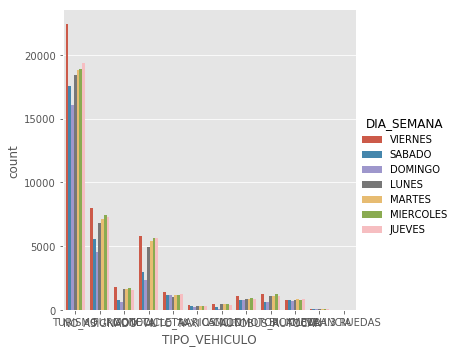

In [153]:
sb.catplot('TIPO_VEHICULO',data=df_accs,hue='DIA_SEMANA',kind="count")

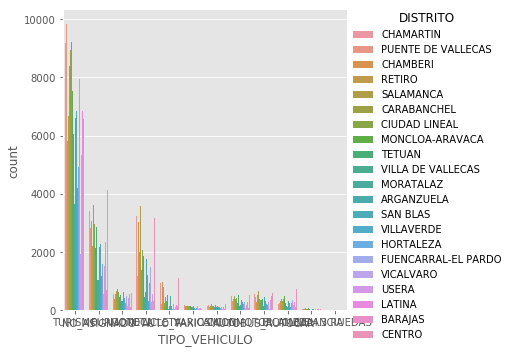

In [169]:
sb.catplot('TIPO_VEHICULO',data=df_accs,hue='DISTRITO',kind="count")

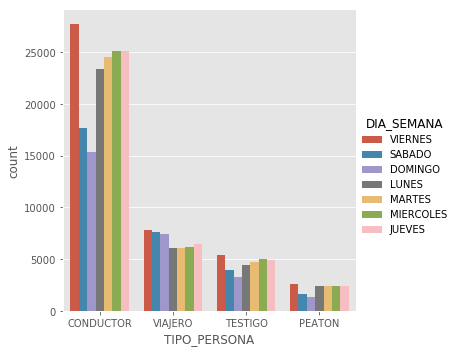

In [170]:
sb.catplot('TIPO_PERSONA',data=df_accs,hue='DIA_SEMANA',kind="count")

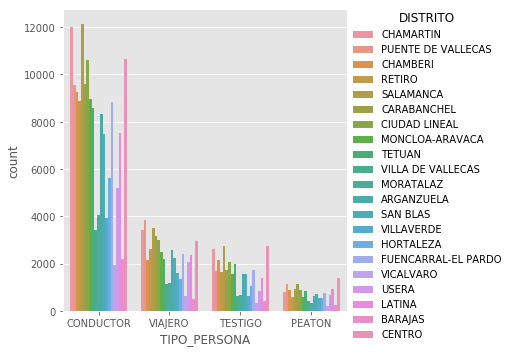

In [171]:
sb.catplot('TIPO_PERSONA',data=df_accs,hue='DISTRITO',kind="count")

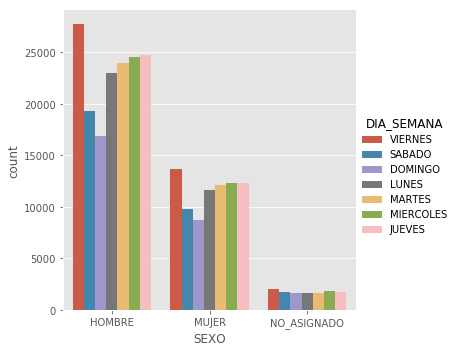

In [172]:
sb.catplot('SEXO',data=df_accs,hue='DIA_SEMANA',kind="count")

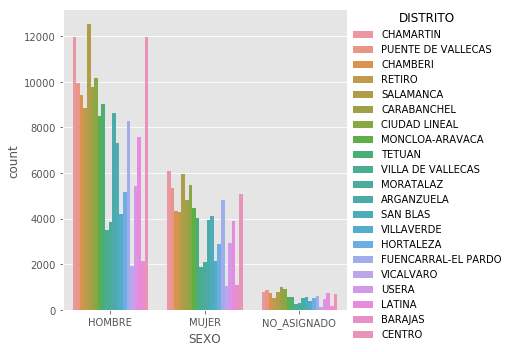

In [173]:
sb.catplot('SEXO',data=df_accs,hue='DISTRITO',kind="count")

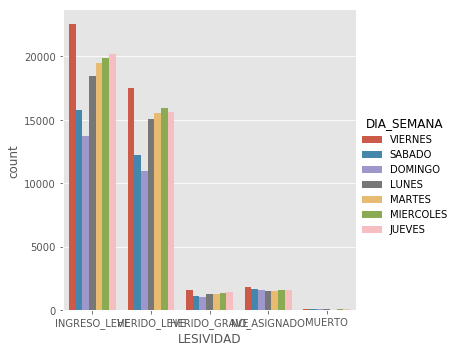

In [174]:
sb.catplot('LESIVIDAD',data=df_accs,hue='DIA_SEMANA',kind="count")

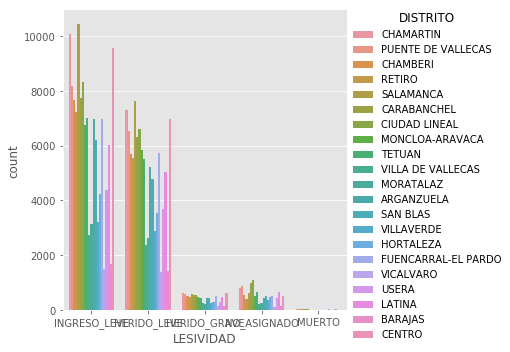

In [175]:
sb.catplot('LESIVIDAD',data=df_accs,hue='DISTRITO',kind="count")

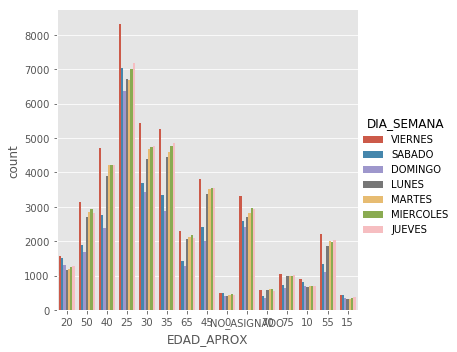

In [176]:
sb.catplot('EDAD_APROX',data=df_accs,hue='DIA_SEMANA',kind="count")

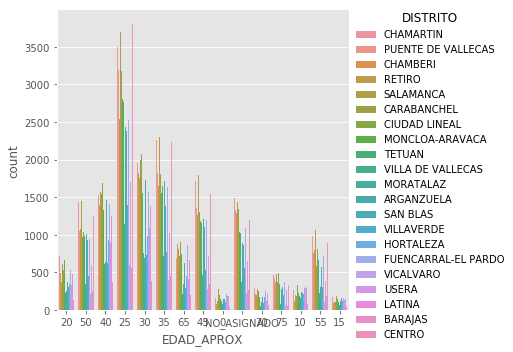

In [177]:
sb.catplot('EDAD_APROX',data=df_accs,hue='DISTRITO',kind="count")

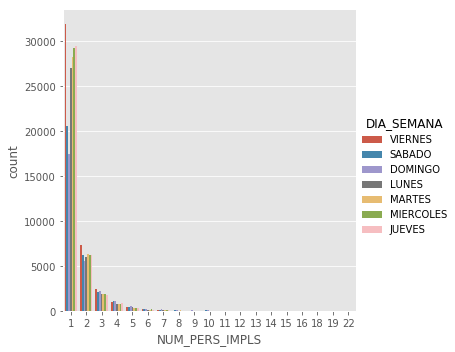

In [178]:
sb.catplot('NUM_PERS_IMPLS',data=df_accs,hue='DIA_SEMANA',kind="count")

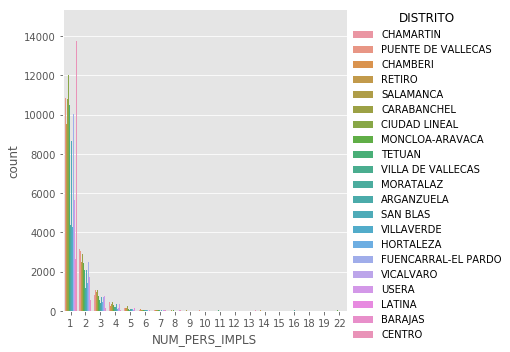

In [179]:
sb.catplot('NUM_PERS_IMPLS',data=df_accs,hue='DISTRITO',kind="count")

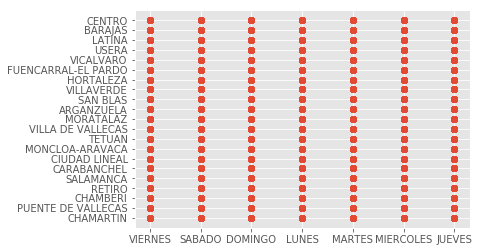

In [180]:
plt.scatter(df_accs['DIA_SEMANA'].values, df_accs['DISTRITO'].values)
plt.show()

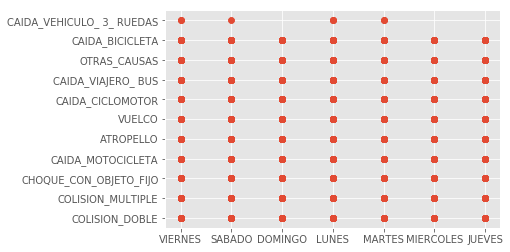

In [184]:
plt.scatter(df_accs['DIA_SEMANA'].values, df_accs['TIPO_ACCIDENTE'].values)
plt.show()

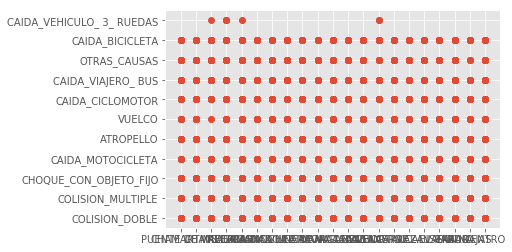

In [185]:
plt.scatter(df_accs['DISTRITO'].values, df_accs['TIPO_ACCIDENTE'].values)
plt.show()

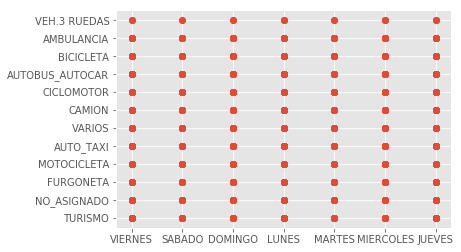

In [188]:
plt.scatter(df_accs['DIA_SEMANA'].values, df_accs['TIPO_VEHICULO'].values)
plt.show()

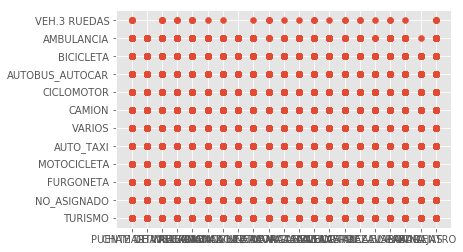

In [189]:
plt.scatter(df_accs['DISTRITO'].values, df_accs['TIPO_VEHICULO'].values)
plt.show()

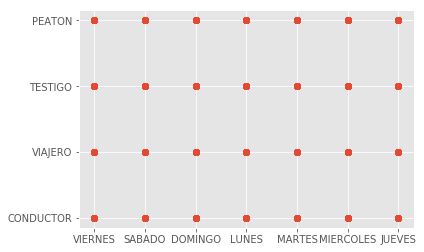

In [190]:
plt.scatter(df_accs['DIA_SEMANA'].values, df_accs['TIPO_PERSONA'].values)
plt.show()

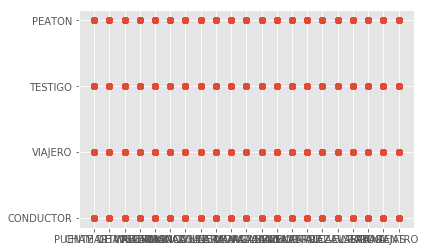

In [191]:
plt.scatter(df_accs['DISTRITO'].values, df_accs['TIPO_PERSONA'].values)
plt.show()

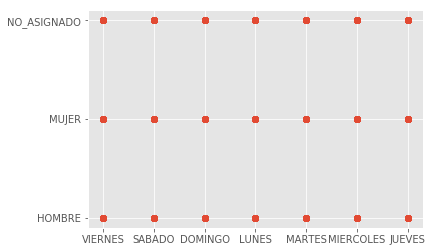

In [192]:
plt.scatter(df_accs['DIA_SEMANA'].values, df_accs['SEXO'].values)
plt.show()

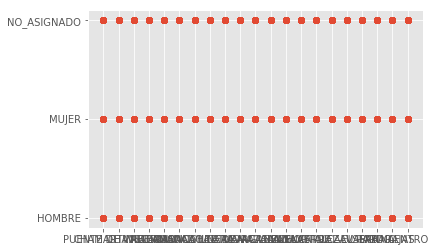

In [193]:
plt.scatter(df_accs['DISTRITO'].values, df_accs['SEXO'].values)
plt.show()

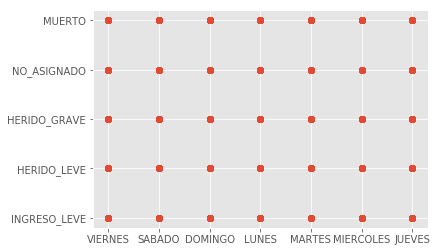

In [194]:
plt.scatter(df_accs['DIA_SEMANA'].values, df_accs['LESIVIDAD'].values)
plt.show()

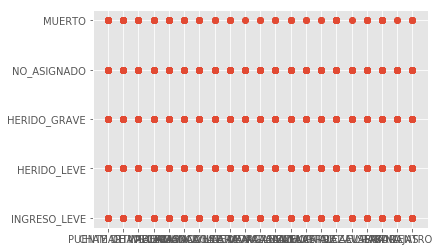

In [195]:
plt.scatter(df_accs['DISTRITO'].values, df_accs['LESIVIDAD'].values)
plt.show()

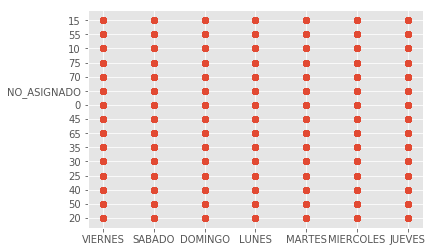

In [196]:
plt.scatter(df_accs['DIA_SEMANA'].values, df_accs['EDAD_APROX'].values)
plt.show()

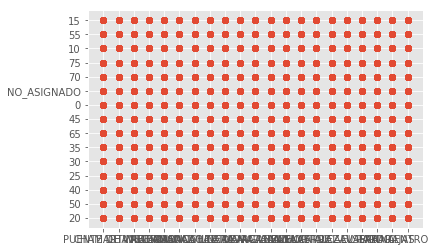

In [197]:
plt.scatter(df_accs['DISTRITO'].values, df_accs['EDAD_APROX'].values)
plt.show()

In [ ]:
plt.scatter(df_accs['DIA_SEMANA'].values, df_accs['NUM_PERSONAS'].values)
plt.show()

In [ ]:
# Mapeo de datos

In [ ]:
#Filtro: Columnas que empiezan por xxx
#filtro_borrar = [col for col in df_accs if col.startswith('NUM_PERS')]
# borrar columnas sobrantes:
#df_accs = df_accs.drop(columns=filtro_borrar)

In [ ]:
df_accs_lab = df_accs.copy()

In [ ]:
df_accs.head(1)

In [ ]:
df_accs_lab.head(1)

In [ ]:
df_accs.columns

In [ ]:
df_accs_lab.columns

In [ ]:
df_accs.dtypes

In [ ]:
df_accs_lab.dtypes

In [ ]:
# No haría falta: df_accs_lab["EDAD_APROX"]=df_accs_lab['EDAD_APROX'].astype(np.int64)

In [ ]:
df_accs.shape

In [ ]:
df_accs_lab.shape

In [181]:
# Etiquetamos de forma general mediante One Hot Encoding
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder() 

In [182]:
df_accs_lab['HORA']= lab.fit_transform(df_accs_lab['HORA'])
df_accs_lab['DIA_SEMANA']= lab.fit_transform(df_accs_lab['DIA_SEMANA'])
df_accs_lab['NUMS_PERSONAS']= lab.fit_transform(df_accs_lab['NUM_PERSONAS'])
df_accs_lab['DISTRITO']= lab.fit_transform(df_accs_lab['DISTRITO'])

In [183]:
df_accs_lab.columns

Index(['FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERSONAS',
       'TIPO_ACCIDENTE', 'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD',
       'EDAD_APROX', 'NUMS_PERSONAS'],
      dtype='object')

In [188]:
df_accs_lab.dtypes

HORA            int64
DIA_SEMANA      int64
DISTRITO        int64
NUM_PERSONAS    int64
dtype: object

In [187]:
drop_columns = ['FECHA', 'TIPO_ACCIDENTE', 'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX']
df_accs_lab = df_accs_lab.drop(drop_columns, axis = 1)

In [ ]:
y con  coef para univariante
# graficando los resultados
lastgift = pd.Series({'promedio gral': prob_gral, 'lastgift<=10': lastgift10})
plot=lastgift.plot(kind='barh', 
                   color=['blue', 'green']).set_title('Pobabilidad de donar')

In [118]:
df_accs_lab.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO'], dtype='object')

In [119]:
X=df_accs_lab[['HORA', 'DIA_SEMANA', 'NUM_PERS_IMPLS']]
y=df_accs_lab['DISTRITO']

len(df_accs_lab)

252998

In [121]:
# Train-test split
# Load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)



# Classification

## Logistic regression model

In [ ]:
# Load the library
from sklearn.linear_model import LogisticRegression
# Create an instance of the classifier
clf_LR=LogisticRegression()
# Fit only with training data
clf_LR.fit(X_train,y_train)

In [ ]:
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
clfk.best_params_
reg.coef_

clfk.best_score_

## K nearest neighbors

In [ ]:
# Load the library
from sklearn.neighbors import KNeighborsClassifier
# Create an instance
reg_KN = KNeighborsClassifier(n_neighbors=5)
# Fit only with training data
reg_KN.fit(X_train,y_train)

## Decision Tree

In [ ]:
# Import library
from sklearn.tree import DecisionTreeClassifier
# Create instance
clf_DT = DecisionTreeClassifier(min_samples_leaf=20,max_depth=3)
# Fit only with training data
clf_DT.fit(X_train,y_train)

## Support Vector Machine
Parameters:
* C: Sum of Error Margins
* kernel:
 * linear: line of separation
 * rbf: circle of separation
    * Additional param gamma: Inverse of the radius
 * poly: curved line of separation
    * Additional param degree: Degree of the polynome

In [ ]:
# Load the library
from sklearn.svm import SVC
# Create an instance of the classifier
clf_SVM = SVC(kernel="linear")
# Fit only with training data
clf_SVM.fit(X_train,y_train)